# Import necessary python library
  

In [1]:
import zipfile
import pandas as pd
import numpy as np
from zipfile import ZipFile
import os
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error
import glob
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,  cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# specifying the zip file name

In [2]:

file_name = "Stress_dataset.zip"
  

In [3]:
# Extract the files from the zipped folder
with zipfile.ZipFile(file_name, 'r') as zip:
    # printing all the contents of the zip file
    zip.printdir()


# extracting all the files
print('Extracting all the files now...')
print('Done!')


File Name                                             Modified             Size
15/                                            2021-09-06 11:51:56            0
15/15_1594140175.zip                           2021-09-06 11:01:26      2274410
15/15_1594149654.zip                           2021-09-06 11:01:26       594814
15/15_1594213322.zip                           2021-09-06 11:01:26      1639127
15/15_1594220239.zip                           2021-09-06 11:01:26      4293942
15/15_1594238057.zip                           2021-09-06 11:01:26       845599
15/15_1594298975.zip                           2021-09-06 11:01:26      3461722
15/15_1594311202.zip                           2021-09-06 11:01:26      4185452
15/15_1594325201.zip                           2021-09-06 11:01:26      1707364
15/15_1594378283.zip                           2021-09-06 11:01:26       295830
15/15_1594380033.zip                           2021-09-06 11:01:26      2750887
15/15_1595334888.zip                    

In [4]:
files = glob.glob('C:/tithi/Term 2/combineeee_dataset/*.csv')

readFile_count = len(files)
print ("combineeee_dataset:", readFile_count);

combineeee_dataset: 4


In [5]:
# Loop through each CSV file, read it as a DataFrame, and get its shape
for file in files:
    df = pd.read_csv(file)
    shape = df.shape
    print(f"File: {file}, Rows: {shape[0]}, Columns: {shape[1]}")
    missing_values = df.isnull().sum()
    print(f"File: {file}")
    print(missing_values)

File: C:/tithi/Term 2/combineeee_dataset\combined_acc.csv, Rows: 2762376, Columns: 5
File: C:/tithi/Term 2/combineeee_dataset\combined_acc.csv
id          0
X           0
Y           0
Z           0
datetime    0
dtype: int64
File: C:/tithi/Term 2/combineeee_dataset\combined_eda.csv, Rows: 345288, Columns: 3
File: C:/tithi/Term 2/combineeee_dataset\combined_eda.csv
id          0
EDA         0
datetime    0
dtype: int64
File: C:/tithi/Term 2/combineeee_dataset\combined_hr.csv, Rows: 86238, Columns: 3
File: C:/tithi/Term 2/combineeee_dataset\combined_hr.csv
id          0
HR          0
datetime    0
dtype: int64
File: C:/tithi/Term 2/combineeee_dataset\combined_temp.csv, Rows: 0, Columns: 3
File: C:/tithi/Term 2/combineeee_dataset\combined_temp.csv
id          0.0
TEMP        0.0
datetime    0.0
dtype: float64


In [6]:
# Loop through each CSV file, read it as a DataFrame, and check data types
for file in files:
    df = pd.read_csv(file)
    data_types = df.dtypes
    print(f"File: {file}")
    print(data_types)

File: C:/tithi/Term 2/combineeee_dataset\combined_acc.csv
id           object
X           float64
Y           float64
Z           float64
datetime    float64
dtype: object
File: C:/tithi/Term 2/combineeee_dataset\combined_eda.csv
id           object
EDA         float64
datetime    float64
dtype: object
File: C:/tithi/Term 2/combineeee_dataset\combined_hr.csv
id           object
HR          float64
datetime    float64
dtype: object
File: C:/tithi/Term 2/combineeee_dataset\combined_temp.csv
id          object
TEMP        object
datetime    object
dtype: object


In [7]:
import pandas as pd

# List of file paths
file_paths = [
    'C:/tithi/Term 2/combineeee_dataset\combined_acc.csv',
    'C:/tithi/Term 2/combineeee_dataset\combined_eda.csv',
    'C:/tithi/Term 2/combineeee_dataset\combined_hr.csv',
    'C:/tithi/Term 2/combineeee_dataset\combined_temp.csv'
]

# Load each CSV file into a DataFrame
dfs = [pd.read_csv(file_path) for file_path in file_paths]

# Merge DataFrames based on 'id' and 'datetime'
merged_df = dfs[0]  # Start with the first DataFrame
for df in dfs[1:]:
    merged_df = pd.merge(merged_df, df, on=['id', 'datetime'], how='outer')

# Specify the output path and save the merged DataFrame as CSV
output_path = 'C:/tithi/Term 2/merge_dataset.csv'
merged_df.to_csv(output_path, index=False)

# Display the first few rows of the merged DataFrame
print(merged_df.head())


   id    X     Y     Z      datetime  EDA  HR TEMP
0  6D  1.0 -59.0  26.0  1.594752e+09  0.0 NaN  NaN
1  6D  2.0 -59.0  25.0  1.594752e+09  NaN NaN  NaN
2  6D  2.0 -60.0  24.0  1.594752e+09  NaN NaN  NaN
3  6D  1.0 -58.0  26.0  1.594752e+09  NaN NaN  NaN
4  6D  1.0 -55.0  27.0  1.594752e+09  NaN NaN  NaN


In [8]:
# Summary statistics
print(merged_df.describe())

                  X             Y             Z      datetime            EDA  \
count  2.762376e+06  2.762376e+06  2.762376e+06  2.762378e+06  345288.000000   
mean  -3.014941e+01  6.676912e+00  2.712752e+01  1.595192e+09       0.427730   
std    2.582969e+01  3.376658e+01  2.708712e+01  3.108686e+05       0.340287   
min   -1.280000e+02 -1.280000e+02 -1.280000e+02  1.594752e+09       0.000000   
25%   -5.000000e+01 -4.000000e+00  7.000000e+00  1.594921e+09       0.216786   
50%   -3.400000e+01  6.000000e+00  3.000000e+01  1.595010e+09       0.349761   
75%   -1.200000e+01  2.200000e+01  5.100000e+01  1.595531e+09       0.583201   
max    1.270000e+02  1.270000e+02  1.270000e+02  1.595623e+09       5.075757   

                 HR  
count  86238.000000  
mean      87.257713  
std       15.843713  
min       47.700000  
25%       76.670000  
50%       84.670000  
75%       94.480000  
max      200.850000  


In [9]:
merged_df.shape

(2762378, 8)

In [10]:
# chceking the missing values
merged_df.isna().sum()

id                0
X                 2
Y                 2
Z                 2
datetime          0
EDA         2417090
HR          2676140
TEMP        2762378
dtype: int64

In [11]:
# chceking the datatype
merged_df.dtypes

id           object
X           float64
Y           float64
Z           float64
datetime    float64
EDA         float64
HR          float64
TEMP         object
dtype: object

In [12]:
# chceking the corelation
merged_df.corr()

C:\Users\Tithi\AppData\Local\Temp\ipykernel_19324\1829915651.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  merged_df.corr()


,X,Y,Z,datetime,EDA,HR
X,1.000000,0.275343,0.216336,-0.168725,-0.055337,0.127681
Y,0.275343,1.000000,-0.168701,0.063666,-0.203153,0.099643
Z,0.216336,-0.168701,1.000000,0.016678,0.101803,-0.147354
datetime,-0.168725,0.063666,0.016678,1.000000,-0.145969,-0.181846
EDA,-0.055337,-0.203153,0.101803,-0.145969,1.000000,0.040173
HR,0.127681,0.099643,-0.147354,-0.181846,0.040173,1.000000


In [13]:
# loading the dataset
pd.set_option('display.max_columns', 100)
df = pd.read_csv('C:\\tithi\\Term 2\\Data science and decision making\\merged_data_labeled.csv')

df.head(5)

,X,Y,Z,EDA,HR,TEMP,id,datetime,label
0,-27.0,4.0,58.0,0.5153,108.03,NaN,6D,2020-07-16 14:49:00.000000000,2.0
1,-26.0,4.0,58.0,NaN,NaN,NaN,6D,2020-07-16 14:49:00.031249920,2.0
2,-27.0,4.0,58.0,NaN,NaN,NaN,6D,2020-07-16 14:49:00.062500096,2.0
3,-27.0,4.0,58.0,NaN,NaN,NaN,6D,2020-07-16 14:49:00.093750016,2.0
4,-27.0,4.0,58.0,NaN,NaN,NaN,6D,2020-07-16 14:49:00.124999936,2.0


In [14]:
# class variation
df['label'].value_counts()

0.0    503041
2.0     88322
Name: label, dtype: int64

In [15]:
df['label'].value_counts(normalize = True)

0.0    0.850647
2.0    0.149353
Name: label, dtype: float64

In [16]:
# Summary statistics
print(df.describe())

                   X              Y              Z           EDA  \
count  591363.000000  591363.000000  591363.000000  73923.000000   
mean      -22.563798       5.281994      33.187185      0.405043   
std        28.778373      33.279034      25.659222      0.118523   
min      -128.000000    -128.000000    -128.000000      0.000000   
25%       -46.000000     -11.000000      11.000000      0.320294   
50%       -24.000000       5.000000      34.000000      0.393321   
75%        -1.000000      21.000000      58.000000      0.494801   
max       127.000000     127.000000     127.000000      1.723618   

                 HR  TEMP          label  
count  18483.000000   0.0  591363.000000  
mean      87.589964   NaN       0.298707  
std       13.522212   NaN       0.712873  
min       55.550000   NaN       0.000000  
25%       78.300000   NaN       0.000000  
50%       86.530000   NaN       0.000000  
75%       94.640000   NaN       0.000000  
max      152.750000   NaN       2.000000  


In [17]:
# chceking the corelation
df.corr()

C:\Users\Tithi\AppData\Local\Temp\ipykernel_19324\903809513.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,X,Y,Z,EDA,HR,TEMP,label
X,1.000000,0.269723,0.271741,0.049542,-0.005092,NaN,-0.177076
Y,0.269723,1.000000,-0.183515,-0.053961,-0.136979,NaN,-0.206369
Z,0.271741,-0.183515,1.000000,0.251835,-0.020636,NaN,-0.058543
EDA,0.049542,-0.053961,0.251835,1.000000,-0.013861,NaN,0.541943
HR,-0.005092,-0.136979,-0.020636,-0.013861,1.000000,NaN,0.058701
TEMP,NaN,NaN,NaN,NaN,NaN,NaN,NaN
label,-0.177076,-0.206369,-0.058543,0.541943,0.058701,NaN,1.000000


In [18]:
# correlation of all columns with the class column
df.corr()['label']

C:\Users\Tithi\AppData\Local\Temp\ipykernel_19324\736706501.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['label']


X       -0.177076
Y       -0.206369
Z       -0.058543
EDA      0.541943
HR       0.058701
TEMP          NaN
label    1.000000
Name: label, dtype: float64

In [19]:
# imblacement of classes
class_normalized_counts = df['label'].value_counts(normalize = True)
class_normalized_counts

0.0    0.850647
2.0    0.149353
Name: label, dtype: float64

In [20]:
# Expected equal distribution (assuming no bias)
expected_distribution = [0.5, 0.5]

In [21]:
# Performing Chi-Square test for independence
chi2_stat, p_val = stats.chisquare(class_normalized_counts, expected_distribution)

print("Chi-Square Statistic:", chi2_stat)
print("P-value:", p_val)

Chi-Square Statistic: 0.49181250663616244
P-value: 0.48311989893225216


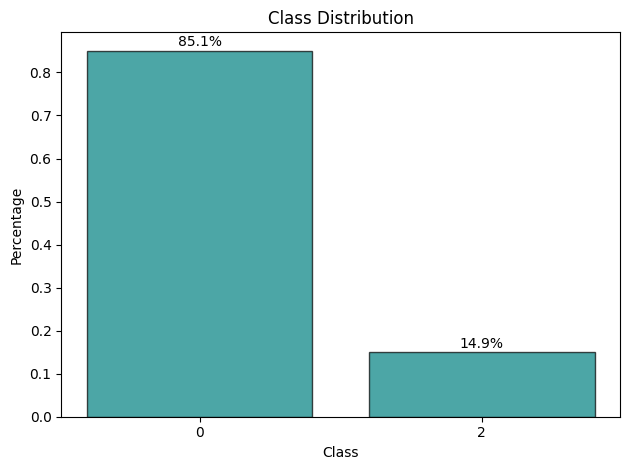

In [22]:
import matplotlib.pyplot as plt

# Create a bar plot to show class distribution
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Percentage')

# Make sure the tick labels match the classes present in your data
tick_labels = ['0', '2']

bars = plt.bar(tick_labels, class_normalized_counts, color='teal',
               align='center', alpha=0.7, edgecolor='black', linewidth=1)

# Adding percentage labels using autopct
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.01, f'{height:.1%}', ha='center', fontsize=10)

plt.xticks(rotation=0)

plt.tight_layout()
plt.show()



In [23]:
# finding strongly connected feature with the class column
class_corr = df.corr()['label']
class_corr = class_corr.sort_values(ascending = False)
class_corr[1:12]

C:\Users\Tithi\AppData\Local\Temp\ipykernel_19324\4198668173.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  class_corr = df.corr()['label']


EDA     0.541943
HR      0.058701
Z      -0.058543
X      -0.177076
Y      -0.206369
TEMP         NaN
Name: label, dtype: float64

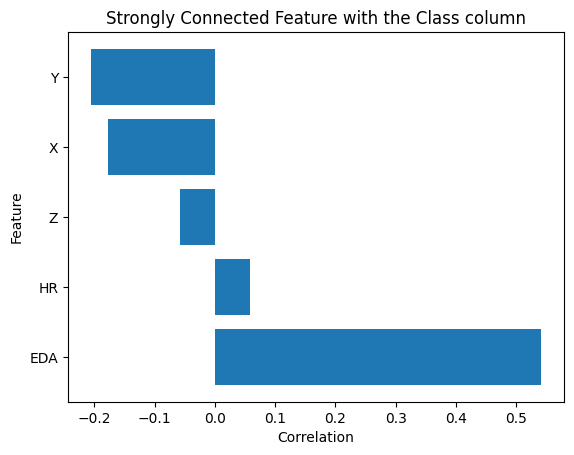

In [24]:
plt.title('Strongly Connected Feature with the Class column')
plt.xlabel('Correlation')
plt.ylabel('Feature')
plt.barh(class_corr.index[1:12],class_corr[1:12])
plt.show()

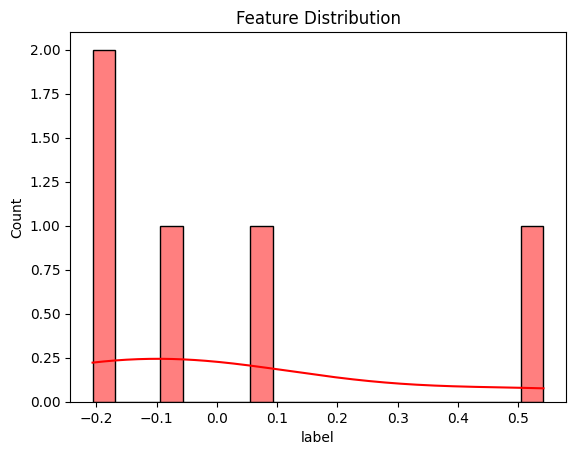

In [25]:
plt.title('Feature Distribution')
sns.histplot(class_corr[1:12],bins = 20,kde = True,color = 'red')
plt.show()

C:\Users\Tithi\AppData\Local\Temp\ipykernel_19324\1141845166.py:16: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df[subset_columns].corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)


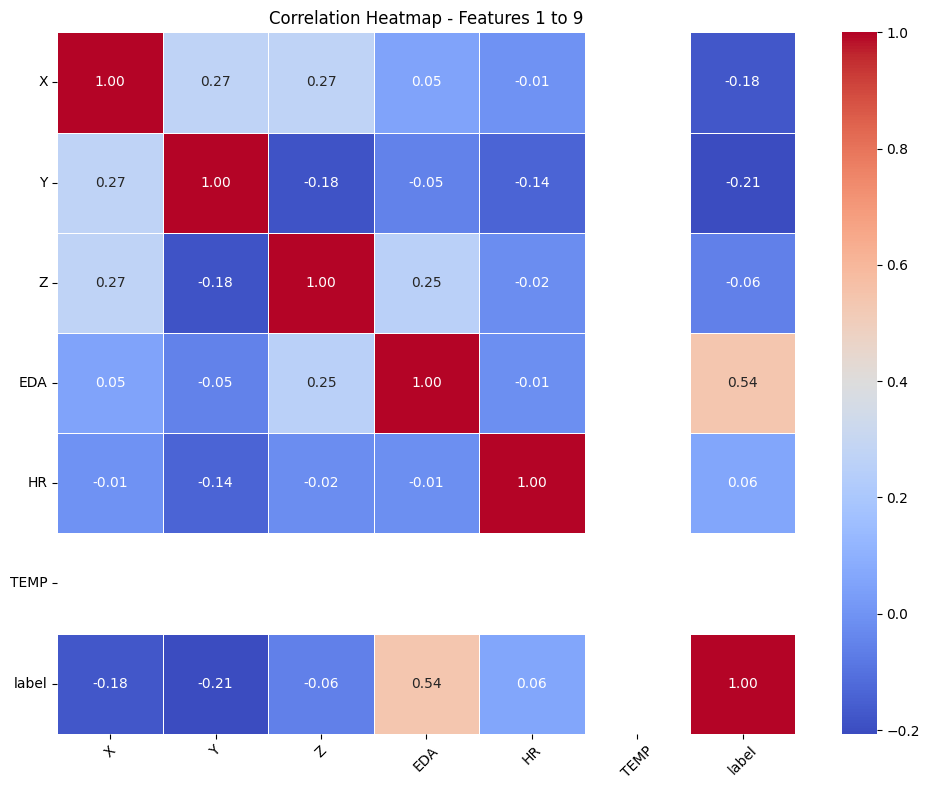

In [26]:
# drawing correlation heatmap combing 10 feature together
columns = [f'Feature_{i}' for i in range(1, 50)]
# Defining the number of features per heatmap
features_per_heatmap = 10

# Calculating the number of heatmaps needed
num_heatmaps = len(df.columns) // features_per_heatmap + 1

# Creating and displaying multiple heatmaps
for i in range(num_heatmaps):
    start_idx = i * features_per_heatmap
    end_idx = min(start_idx + features_per_heatmap, len(df.columns))
    subset_columns = df.columns[start_idx:end_idx]

    plt.figure(figsize=(10, 8))
    sns.heatmap(df[subset_columns].corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title(f'Correlation Heatmap - Features {start_idx+1} to {end_idx}')
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

In [27]:
X = df.drop(columns = ['label'])
y = df['label']

In [28]:
# Generate a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=10, random_state=42)

# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_validation, X_test, y_validation, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Data preprocessing: Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_validation_scaled = scaler.transform(X_validation)
X_test_scaled = scaler.transform(X_test)

# Train the Logistic Regression model
lr = LogisticRegression(C=0.1, solver='liblinear')
lr.fit(X_train_scaled, y_train)

# Perform cross-validation on the training data
lr_scores = cross_val_score(lr, X_train, y_train, cv=5)

# Predict on the test set
y_pred = lr.predict(X_test_scaled)

# Predict on the validation set
y_validation_pred = lr.predict(X_validation_scaled)

# Evaluate the model on validation set
validation_accuracy = accuracy_score(y_validation, y_validation_pred)
print(f"Validation Accuracy: {validation_accuracy:.2f}")

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print the cross-validation scores
print("Cross-Validation Scores:", lr_scores)
print(f"Mean lr Score: {lr_scores.mean():.2f}")

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Validation Accuracy: 0.86
Accuracy: 0.87
Cross-Validation Scores: [0.8875  0.9     0.875   0.84375 0.85625]
Mean lr Score: 0.87
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.90      0.87       243
           1       0.90      0.85      0.87       257

    accuracy                           0.87       500
   macro avg       0.87      0.87      0.87       500
weighted avg       0.87      0.87      0.87       500



In [29]:
# Initialize the K-Nearest Neighbors (KNN) model
knn = KNeighborsClassifier()

# Perform cross-validation on the training data
cv_scores = cross_val_score(knn, X_train, y_train, cv=5)  # You can adjust the number of folds

# Train the KNN model on the entire training set
knn.fit(X_train, y_train)

# Predict on the test set
y_pred = knn.predict(X_test)

# Predict on the validation set
y_validation_pred = knn.predict(X_validation_scaled)

# Evaluate the model on validation set
validation_accuracy = accuracy_score(y_validation, y_validation_pred)
print(f"Validation Accuracy: {validation_accuracy:.2f}")

# Evaluate the KNN model on the test set
accuracy = accuracy_score(y_test, y_pred)
print(f"KNN Accuracy on Test Set: {accuracy:.2f}")

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print(f"Mean CV Score: {cv_scores.mean():.2f}")

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Validation Accuracy: 0.88
KNN Accuracy on Test Set: 0.86
Cross-Validation Scores: [0.86875 0.83125 0.8625  0.8375  0.8375 ]
Mean CV Score: 0.85
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.89      0.86       243
           1       0.89      0.84      0.86       257

    accuracy                           0.86       500
   macro avg       0.86      0.86      0.86       500
weighted avg       0.87      0.86      0.86       500



In [30]:
# Train the Gaussian Naive Bayes model
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Perform cross-validation on the training data
gnb_scores = cross_val_score(knn, X_train, y_train, cv=5) 

# Predict on the test set
y_pred = gnb.predict(X_test)

# Predict on the validation set
y_validation_pred = gnb.predict(X_validation_scaled)

# Evaluate the model on validation set
validation_accuracy = accuracy_score(y_validation, y_validation_pred)
print(f"Validation Accuracy: {validation_accuracy:.2f}")

# Print the cross-validation scores
print("Cross-Validation Scores:", gnb_scores)
print(f"Mean CV Score: {gnb_scores.mean():.2f}")

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Validation Accuracy: 0.83
Cross-Validation Scores: [0.86875 0.83125 0.8625  0.8375  0.8375 ]
Mean CV Score: 0.85
Accuracy: 0.85
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.91      0.85       243
           1       0.90      0.79      0.84       257

    accuracy                           0.85       500
   macro avg       0.85      0.85      0.85       500
weighted avg       0.85      0.85      0.85       500



In [31]:
# Train the Decision Tree model
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = dt_classifier.predict(X_test)

# Predict on the validation set
y_validation_pred = dt_classifier.predict(X_validation_scaled)

# Evaluate the model on validation set
validation_accuracy = accuracy_score(y_validation, y_validation_pred)
print(f"Validation Accuracy: {validation_accuracy:.2f}")

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Validation Accuracy: 0.85
Accuracy: 0.94
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.94      0.93       243
           1       0.94      0.93      0.94       257

    accuracy                           0.94       500
   macro avg       0.94      0.94      0.94       500
weighted avg       0.94      0.94      0.94       500



In [32]:
# Train the C-Support Vector Classification (SVC) model
svc = SVC(C=1.0, kernel='linear', random_state=42)  # You can adjust C and kernel
svc.fit(X_train, y_train)

# Predict on the test set
y_pred = svc.predict(X_test)

# Predict on the validation set
y_validation_pred = svc.predict(X_validation_scaled)

# Evaluate the model on validation set
validation_accuracy = accuracy_score(y_validation, y_validation_pred)
print(f"Validation Accuracy: {validation_accuracy:.2f}")

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Validation Accuracy: 0.87
Accuracy: 0.87
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.88      0.87       243
           1       0.89      0.85      0.87       257

    accuracy                           0.87       500
   macro avg       0.87      0.87      0.87       500
weighted avg       0.87      0.87      0.87       500



In [33]:
# Initialize the Random Forest classifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust the number of estimators

# Train the Random Forest model
random_forest.fit(X_train, y_train)

# Predict on the test set
y_pred = random_forest.predict(X_test)

# Predict on the validation set
y_validation_pred = random_forest.predict(X_validation_scaled)

# Evaluate the model on validation set
validation_accuracy = accuracy_score(y_validation, y_validation_pred)
print(f"Validation Accuracy: {validation_accuracy:.2f}")

# Evaluate the Random Forest model
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy:.2f}")

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Validation Accuracy: 0.91
Random Forest Accuracy: 0.95
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       243
           1       0.96      0.94      0.95       257

    accuracy                           0.95       500
   macro avg       0.95      0.95      0.95       500
weighted avg       0.95      0.95      0.95       500



In [34]:
# Initialize the base classifier (Decision Tree in this case)
base_classifier = DecisionTreeClassifier()

# Initialize the Bagging classifier
bagging = BaggingClassifier(base_classifier, n_estimators=100, random_state=42)  # You can adjust the number of estimators

# Train the Bagging model
bagging.fit(X_train, y_train)

# Predict on the test set
y_pred = bagging.predict(X_test)

# Predict on the validation set
y_validation_pred = bagging.predict(X_validation_scaled)

# Evaluate the model on validation set
validation_accuracy = accuracy_score(y_validation, y_validation_pred)
print(f"Validation Accuracy: {validation_accuracy:.2f}")

# Evaluate the Bagging model
accuracy = accuracy_score(y_test, y_pred)
print(f"Bagging Accuracy: {accuracy:.2f}")

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Validation Accuracy: 0.91
Bagging Accuracy: 0.96
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       243
           1       0.98      0.94      0.96       257

    accuracy                           0.96       500
   macro avg       0.96      0.96      0.96       500
weighted avg       0.96      0.96      0.96       500



In [35]:
# base classifiers
lr = LogisticRegression(C=0.1,max_iter=1000, random_state=0)
knn = KNeighborsClassifier(n_neighbors=5)
dt = DecisionTreeClassifier(max_depth=23, random_state=0)

# create an AdaBoostClassifier with custom majority voting
class MajorityVotingEnsemble:
    def __init__(self, classifiers):
        self.classifiers = classifiers

    def fit(self, X, y):
        for clf in self.classifiers:
            clf.fit(X, y)

    def predict(self, X):
        predictions = [clf.predict(X) for clf in self.classifiers]
        majority_votes = []
        for i in range(len(X)):
            votes = [p[i] for p in predictions]
            majority_vote = max(set(votes), key=votes.count)
            majority_votes.append(majority_vote)
        return majority_votes

# creating a majority voting ensemble using AdaBoostClassifier
ensemble_clf = [lr, knn, dt]
ensemble = MajorityVotingEnsemble(ensemble_clf)


ensemble.fit(X_train, y_train)

In [36]:
# Predict on the test set
y_pred_ensemble = ensemble.predict(X_test)

# Calculate accuracy
accuracy_ensemble = accuracy_score(y_test, y_pred_ensemble)
print(f"Ensemble Accuracy: {accuracy_ensemble:.2f}")

# Print the classification report for the ensemble
print("Ensemble Classification Report:")
print(classification_report(y_test, y_pred_ensemble))

Ensemble Accuracy: 0.89
Ensemble Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.91      0.89       243
           1       0.91      0.88      0.89       257

    accuracy                           0.89       500
   macro avg       0.89      0.89      0.89       500
weighted avg       0.89      0.89      0.89       500



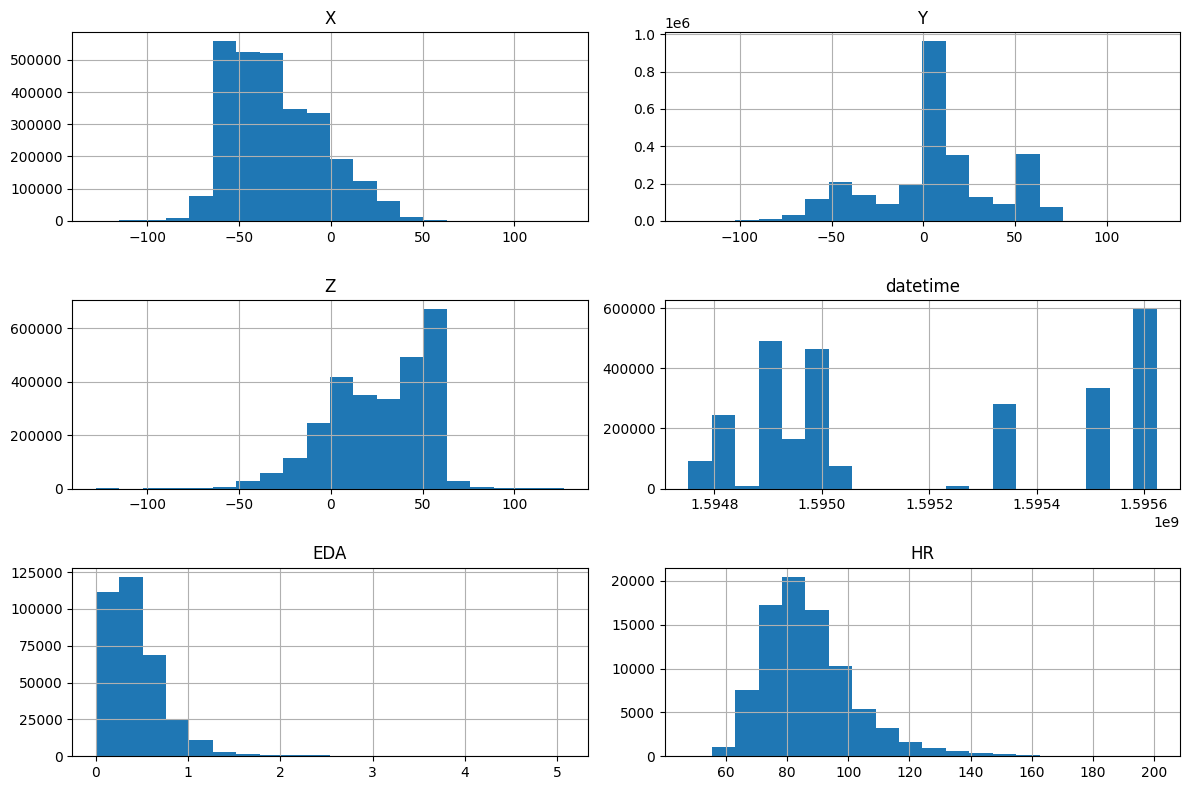

In [37]:
# Data visualization
# Create histograms for numeric columns
numeric_columns = merged_df.select_dtypes(include=['float64']).columns
merged_df[numeric_columns].hist(bins=20, figsize=(12, 8))
plt.tight_layout()
plt.show()

C:\Users\Tithi\AppData\Local\Temp\ipykernel_19324\3033511820.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = merged_df.corr()


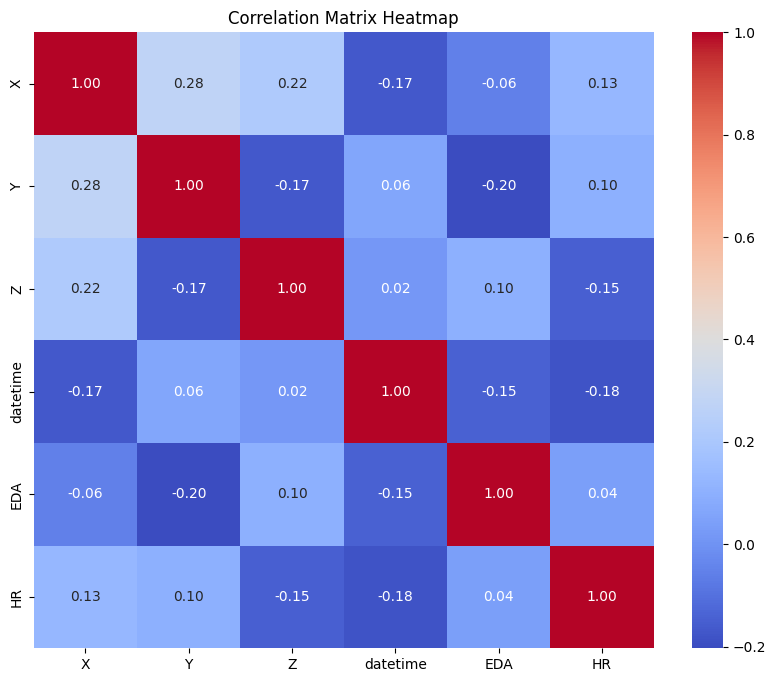

In [38]:
# Correlation matrix heatmap
correlation_matrix = merged_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

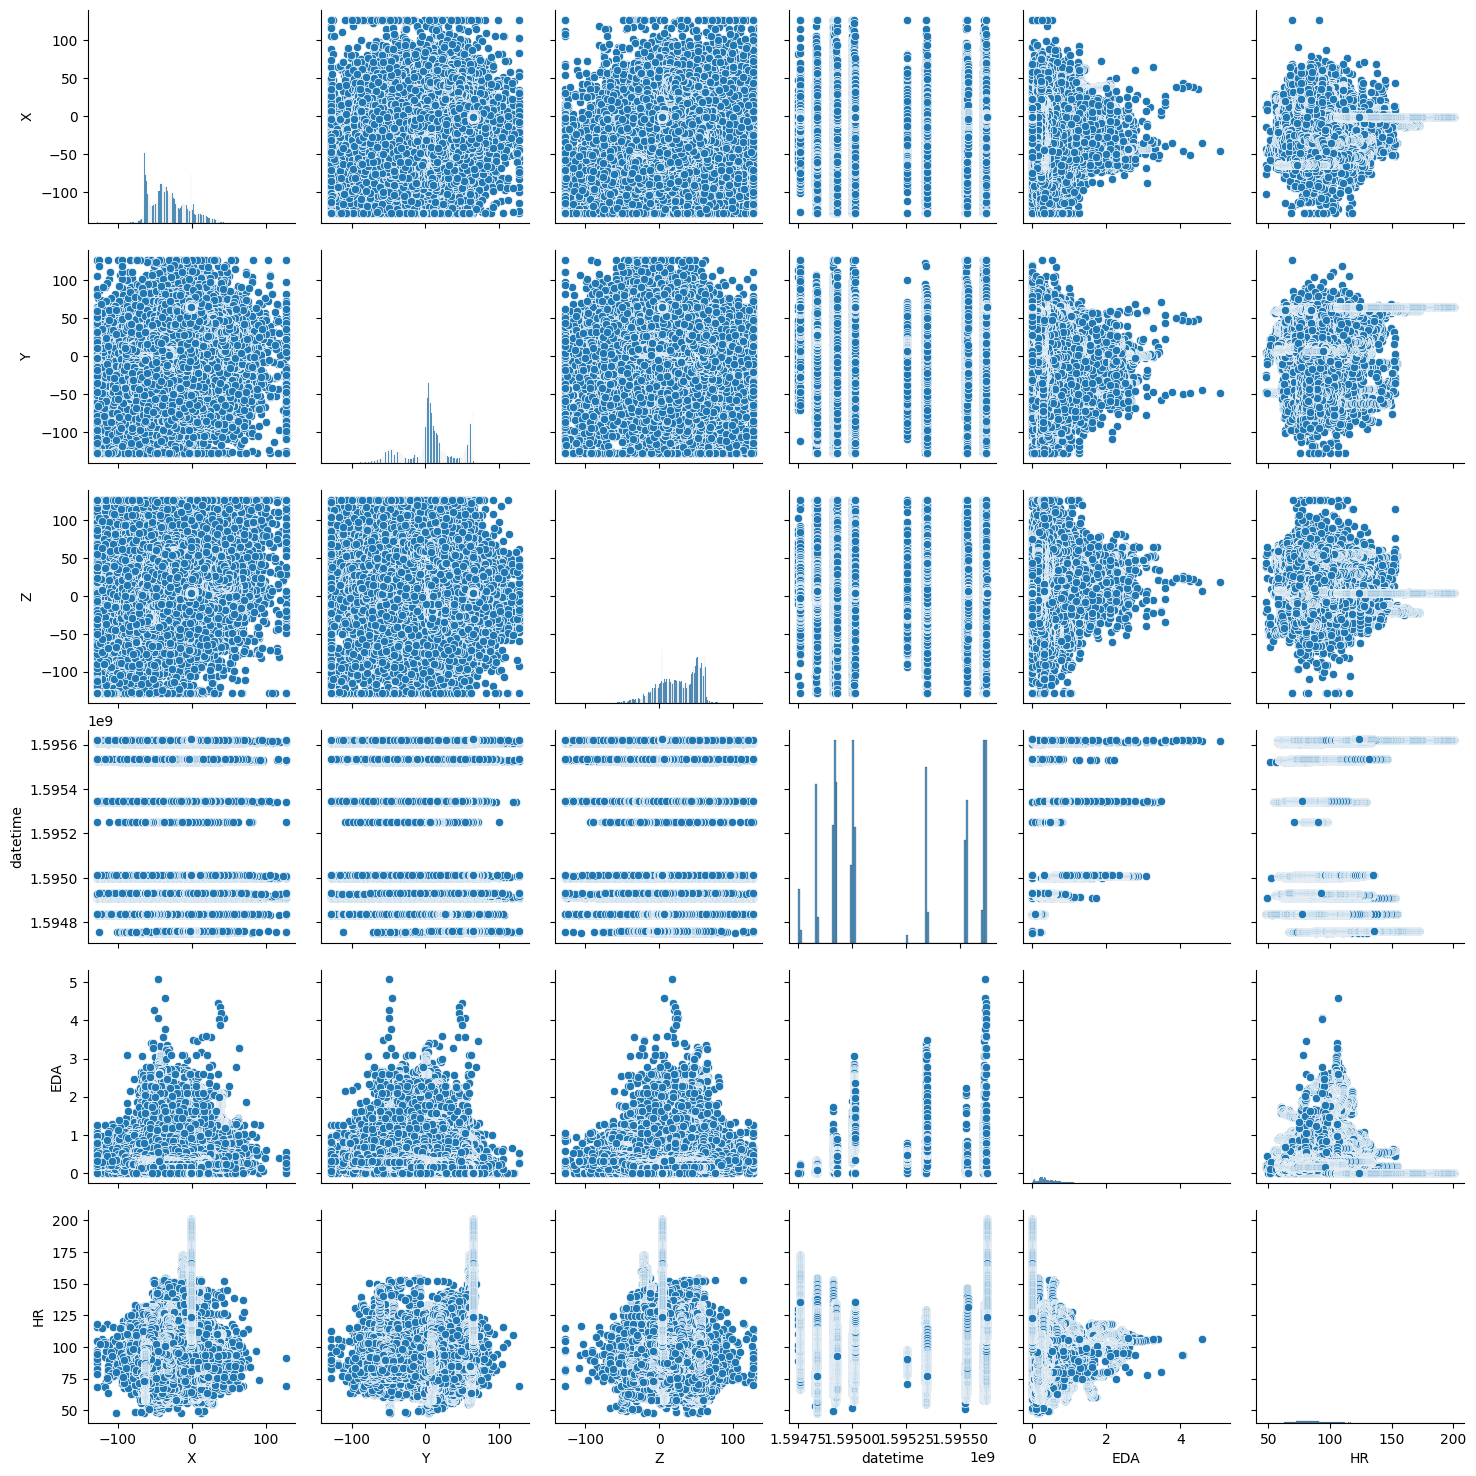

In [39]:
# Pair plots for numeric variables
sns.pairplot(merged_df[numeric_columns])
plt.show()

In [40]:
# Save the DataFrame to the specified directory
save_directory = 'C:/tithi/Term 2/merged_data'
merged_df.to_csv(os.path.join(save_directory, 'merged_and_preprocessed_data.csv'), index=False)

print("Merged and preprocessed data saved to 'merged_and_preprocessed_data.csv'")

Merged and preprocessed data saved to 'merged_and_preprocessed_data.csv'


# Extract the data  from the zipped folder

In [41]:
data=pd.read_excel('SurveyResults.xlsx')

# Print the first 5 rows of the dataset

In [42]:
print('--- First 5 rows of the dataset ---')
print(data.head())

--- First 5 rows of the dataset ---
   ID Start time  End time  duration       date Stress level COVID related  \
0  5C   08:00:00  09:00:00  01:00:00 2020-04-15            1             0   
1  5C   17:31:00  17:58:00  00:27:00 2020-04-14            1             0   
2  E4   15:32:00  15:37:00  00:05:00 2020-04-18            2             0   
3  E4   14:05:00  14:11:00  00:06:00 2020-04-18            2             0   
4  7A   13:52:00  14:03:00  00:11:00 2020-04-18            2             0   

  Treating a covid patient Patient in Crisis Patient or patient's family  \
0                        1                 0                           1   
1                        1                 0                           1   
2                        1                 0                           1   
3                        0                 0                           1   
4                        1                 0                           0   

  Doctors or colleagues  \
0          

# Explore the dataset by checking its shape, data types, and basic statistics:

In [43]:
print('\n--- Shape of the dataset ---')
print(data.shape)



--- Shape of the dataset ---
(358, 20)


In [44]:
print(data.dtypes)


ID                                                                                  object
Start time                                                                          object
End time                                                                            object
duration                                                                            object
date                                                                        datetime64[ns]
Stress level                                                                        object
COVID related                                                                       object
Treating a covid patient                                                            object
Patient in Crisis                                                                   object
Patient or patient's family                                                         object
Doctors or colleagues                                                               object

In [45]:
# print(data.describe())
print(data.describe(datetime_is_numeric=True))


                                date
count                            358
mean   2020-07-24 13:40:33.519553024
min              2020-04-14 00:00:00
25%              2020-06-25 00:00:00
50%              2020-07-07 00:00:00
75%              2020-07-27 00:00:00
max              2020-12-13 00:00:00


In [46]:
data.drop('Lack of supplies', axis=1, inplace=True)

# check for missing values 

# drop rows with missing values

In [47]:
data.dropna(inplace=True)



In [48]:
print(data)

     ID Start time  End time  duration       date Stress level COVID related  \
0    5C   08:00:00  09:00:00  01:00:00 2020-04-15            1             0   
1    5C   17:31:00  17:58:00  00:27:00 2020-04-14            1             0   
2    E4   15:32:00  15:37:00  00:05:00 2020-04-18            2             0   
3    E4   14:05:00  14:11:00  00:06:00 2020-04-18            2             0   
4    7A   13:52:00  14:03:00  00:11:00 2020-04-18            2             0   
..   ..        ...       ...       ...        ...          ...           ...   
353  83   23:05:00  23:50:00  00:45:00 2020-12-12            2             0   
354  83   00:12:00  02:01:00  01:49:00 2020-12-13            2             0   
355  83   20:34:00  20:48:00  00:14:00 2020-12-11            2             0   
356  83   20:54:00  21:13:00  00:19:00 2020-12-11            2             0   
357  BG   19:20:00  19:38:00  00:18:00 2020-12-11            2             0   

    Treating a covid patient Patient in

In [49]:
# There are no missing values, so here can move on to the next step

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

In [51]:
# Explore the distribution of the 'Stress level' column
print(data['Stress level'].describe())

count     358
unique      4
top         2
freq      179
Name: Stress level, dtype: int64


# convert 'Stress level' column to float

In [52]:
# replace 'na' values with NaN
data['Stress level'] = pd.to_numeric(data['Stress level'], errors='coerce')


In [53]:
data

,ID,Start time,End time,duration,date,Stress level,COVID related,Treating a covid patient,Patient in Crisis,Patient or patient's family,Doctors or colleagues,"Administration, lab, pharmacy, radiology, or other ancilliary services\n",Increased Workload,Technology related stress,Documentation,Competency related stress,Saftey (physical or physiological threats),Work Environment - Physical or others: work processes or procedures,Description
0,5C,08:00:00,09:00:00,01:00:00,2020-04-15,1.0,0,1,0,1,0,0,0,0,0,0,0,0,na
1,5C,17:31:00,17:58:00,00:27:00,2020-04-14,1.0,0,1,0,1,0,0,1,0,0,0,0,0,na
2,E4,15:32:00,15:37:00,00:05:00,2020-04-18,2.0,0,1,0,1,0,0,0,0,0,0,0,0,Spoke with family regarding patient's decline ...
3,E4,14:05:00,14:11:00,00:06:00,2020-04-18,2.0,0,0,0,1,0,0,0,0,0,0,0,0,Was placing another FaceTime call to a patient...
4,7A,13:52:00,14:03:00,00:11:00,2020-04-18,2.0,0,1,0,0,0,0,1,0,0,0,0,1,na
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,83,23:05:00,23:50:00,00:45:00,2020-12-12,2.0,0,0,0,0,0,0,0,0,0,0,0,0,na
354,83,00:12:00,02:01:00,01:49:00,2020-12-13,2.0,0,1,0,0,0,0,0,0,0,0,0,0,na
355,83,20:34:00,20:48:00,00:14:00,2020-12-11,2.0,0,1,0,0,0,0,0,0,0,0,0,0,na
356,83,20:54:00,21:13:00,00:19:00,2020-12-11,2.0,0,1,0,0,0,0,0,0,0,0,0,0,na


# Explore the correlation between different signals and the 'Stress level' column

In [54]:
print(data.corr(numeric_only=True)['Stress level'])
# print(data.corr()['Stress level'], numeric_only=True)


Stress level    1.0
Name: Stress level, dtype: float64


In [55]:
# compute correlation matrix
corr_matrix = data.corr(numeric_only=True)


# Identify signals that might be better candidates for predicting stress

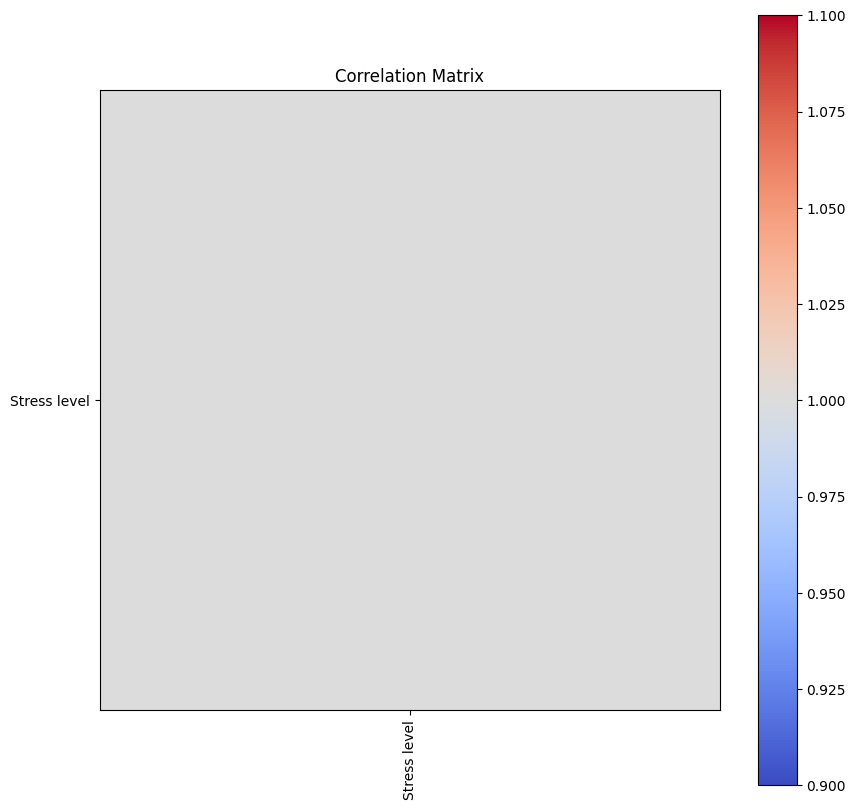

In [56]:
correlations = data.corr(numeric_only=True)
plt.figure(figsize=(10,10))
plt.title("Correlation Matrix")
plt.imshow(correlations, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(correlations.columns)), correlations.columns, rotation=90)
plt.yticks(range(len(correlations.columns)), correlations.columns)
plt.show()

# Split the dataset into training and testing sets (80% training, 20% testing)

In [56]:
train = data.sample(frac=0.8, random_state=1)
test = data.drop(train.index)